Importamos librerias

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Definición de un grafo pesado networkx

In [1]:
G = nx.Graph()

aristas = [
    ('A', 'B', 4),
    ('A', 'H', 8),
    ('B', 'H', 12),
    ('B', 'C', 8),
    ('C', 'I', 3),
    ('C', 'D', 6),
    ('C', 'F', 3),
    ('D', 'F', 5),
    ('D', 'E', 13),
    ('E', 'F', 10),
    ('E', 'G', 9),
    ('F', 'G', 6),
    ('G', 'H', 1),
    ('G', 'I', 4)
]

G.add_weighted_edges_from(aristas)

print(f"Grafo creado:")
print(f"  • Nodos: {sorted(G.nodes())}")
print(f"  • Cantidad de aristas: {G.number_of_edges()}")
print(f"  • Cantidad de nodos: {G.number_of_nodes()}")

NameError: name 'nx' is not defined

Efectos de las posiciones 2D de los nodos en la visualización de un grafo

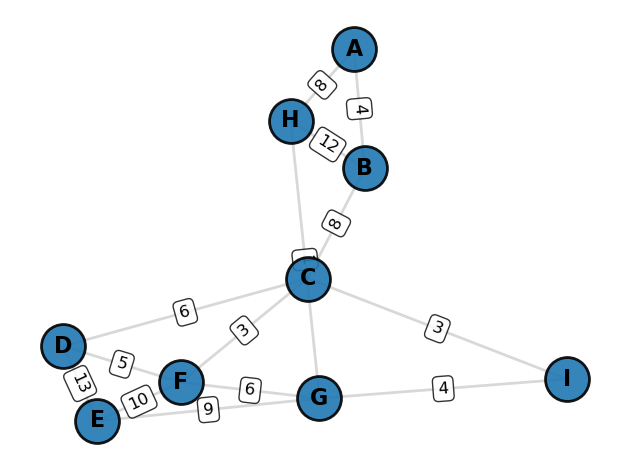

In [5]:
pos = nx.spring_layout(G)  # Posiciones para todos los nodos

# Dibujar todas las aristas en gris claro
nx.draw_networkx_nodes(G, pos, node_size=1000, alpha=0.9, edgecolors='black', linewidths=2)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.3, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12, 
                                bbox=dict(boxstyle='round,pad=0.3', 
                                        facecolor='white', alpha=0.8))

plt.axis('off')
plt.tight_layout()
plt.show()


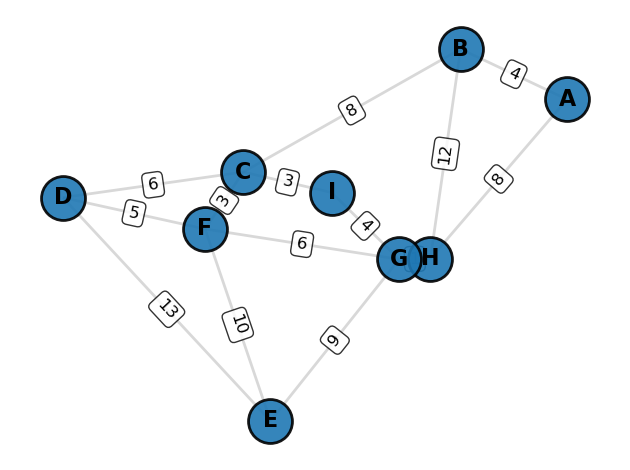

In [6]:
pos = nx.kamada_kawai_layout(G)  # Posiciones para todos los nodos

# Dibujar todas las aristas en gris claro
nx.draw_networkx_nodes(G, pos, node_size=1000, alpha=0.9, edgecolors='black', linewidths=2)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.3, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12, 
                                bbox=dict(boxstyle='round,pad=0.3', 
                                        facecolor='white', alpha=0.8))

plt.axis('off')
plt.tight_layout()
plt.show()


Hardcodeando unas posiciones

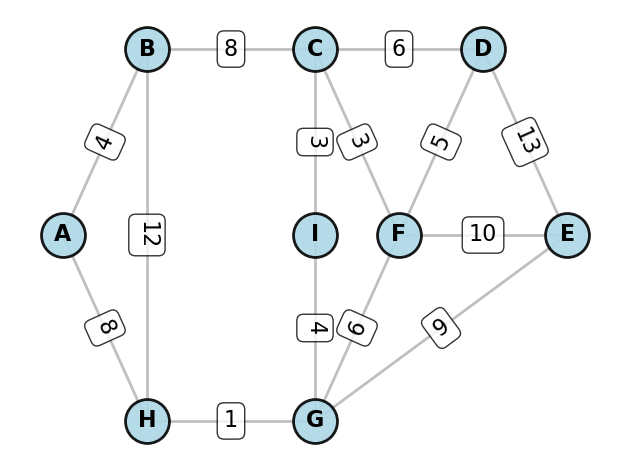

In [9]:
pos = {
    'A': (1, 1), 'B': (2, 2), 'C': (4, 2), 'D': (6, 2), 'E': (7, 1),
    'H': (2, 0), 'G': (4, 0), 'F': (5, 1), 'I': (4, 1)
}

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', 
                       alpha=0.9, edgecolors='black', linewidths=2)
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=16,
                             bbox=dict(boxstyle='round,pad=0.3',
                                     facecolor='white', alpha=0.8))

plt.axis('off')
plt.tight_layout()
plt.show()

Prueba de como pintar unas aristas de un color distinto

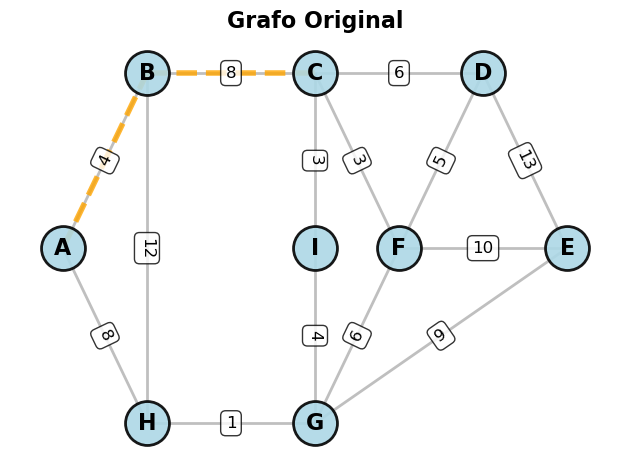

In [10]:
edge_list = [('A', 'B'), ('B', 'C')]

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', 
                       alpha=0.9, edgecolors='black', linewidths=2)

nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')

# Resaltar las aristas en el edge_list
nx.draw_networkx_edges(G, pos, edgelist=edge_list, width=4, alpha=0.8, edge_color='orange', style='dashed')

nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12,
                             bbox=dict(boxstyle='round,pad=0.3',
                                     facecolor='white', alpha=0.8))

plt.title("Grafo Original", fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

Chequeo simple de pesos

In [11]:
# como chequear pesos
G['A']['B']['weight'] 

4

### Prim

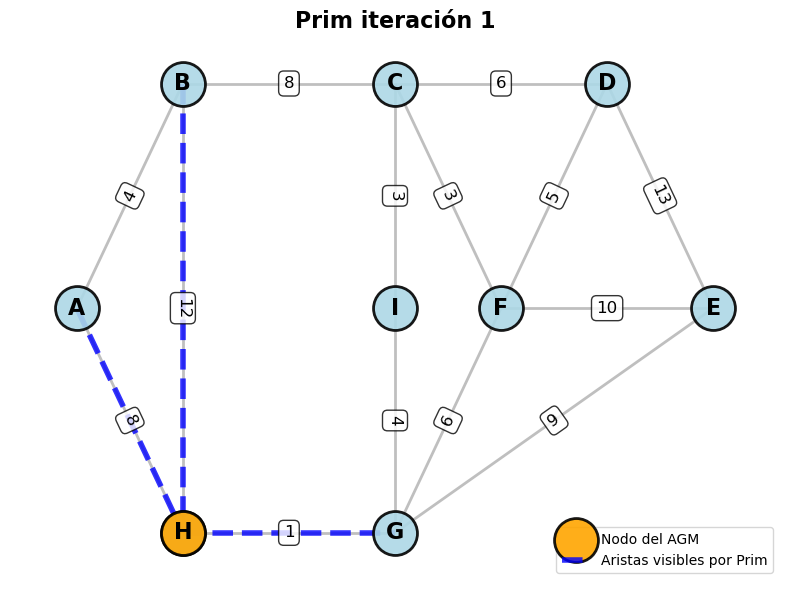

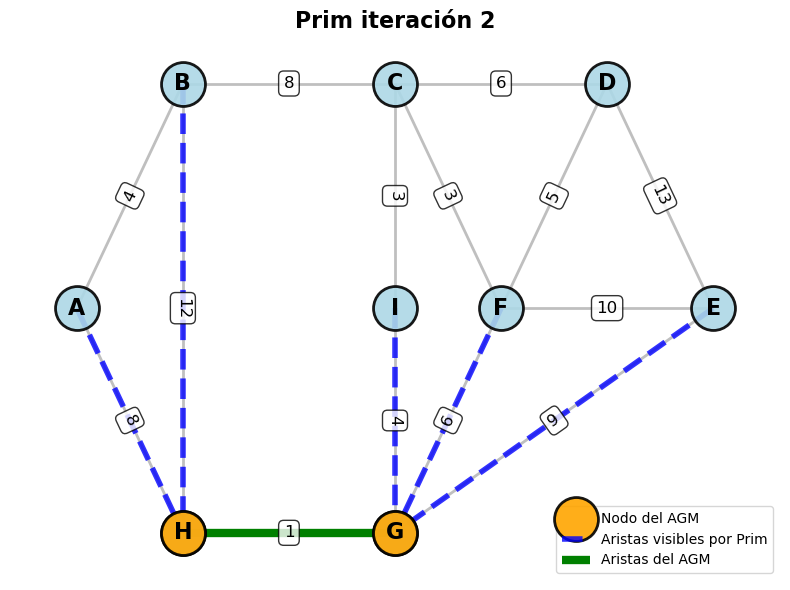

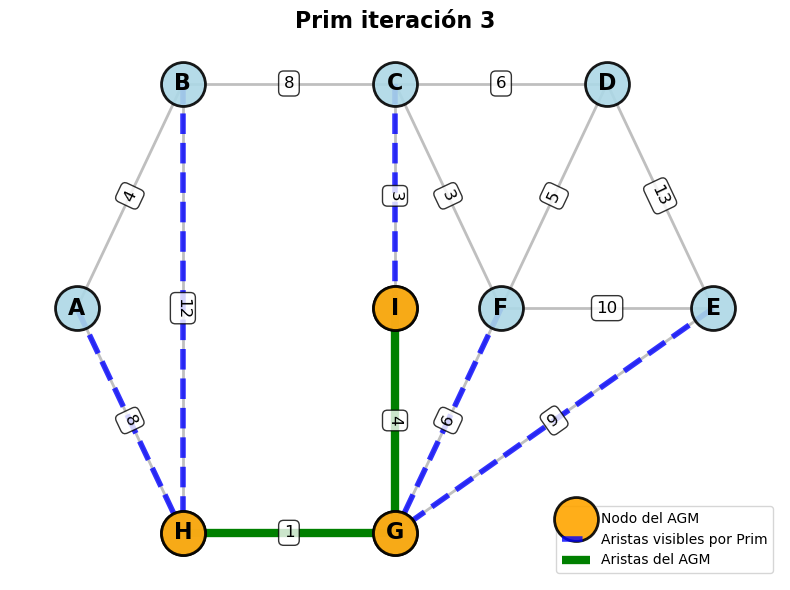

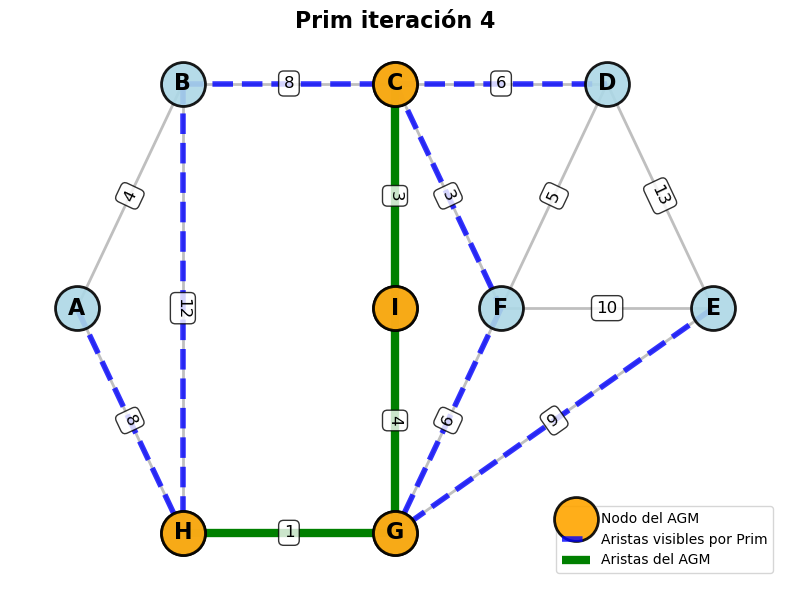

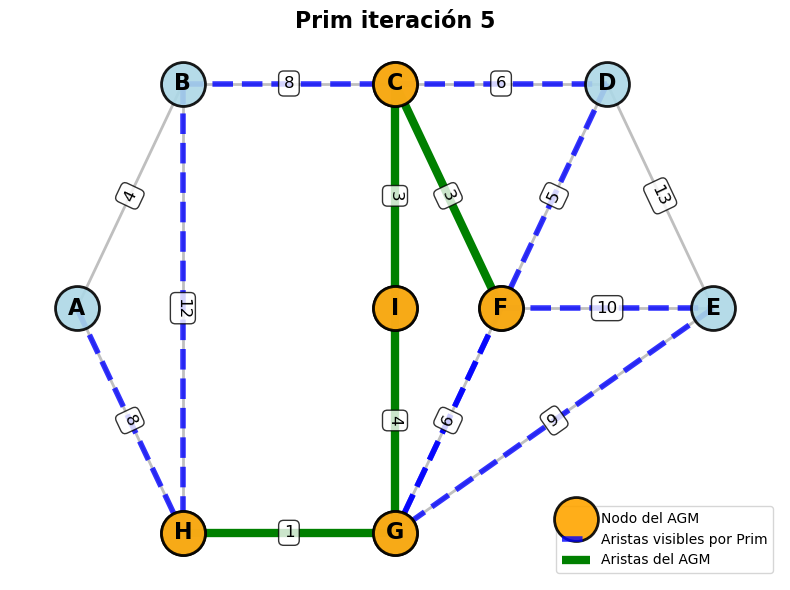

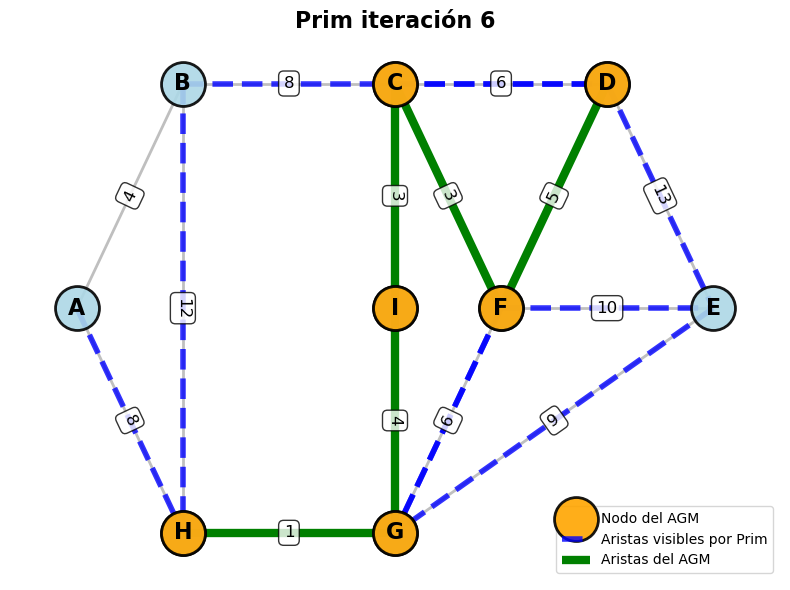

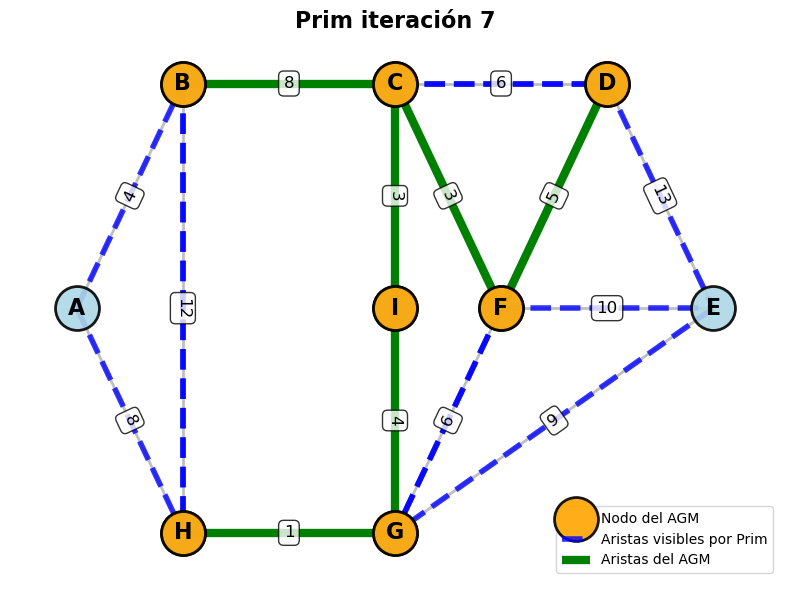

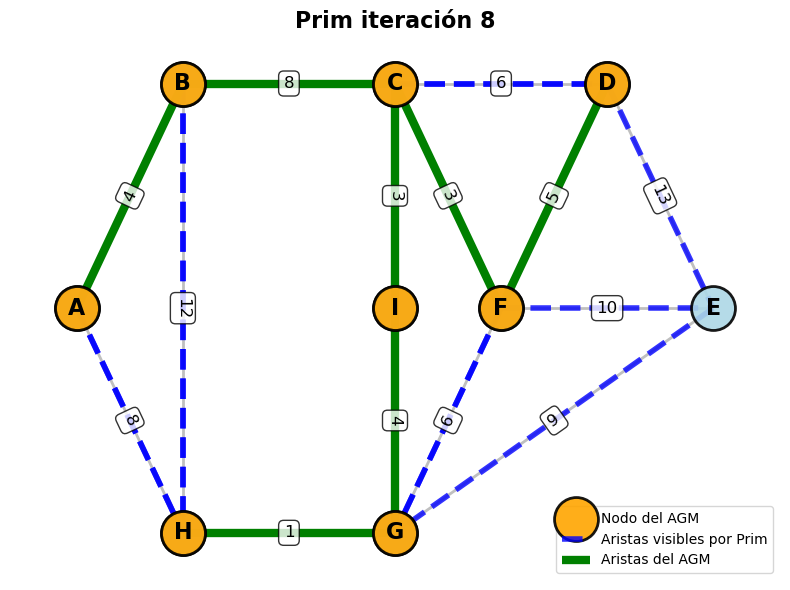

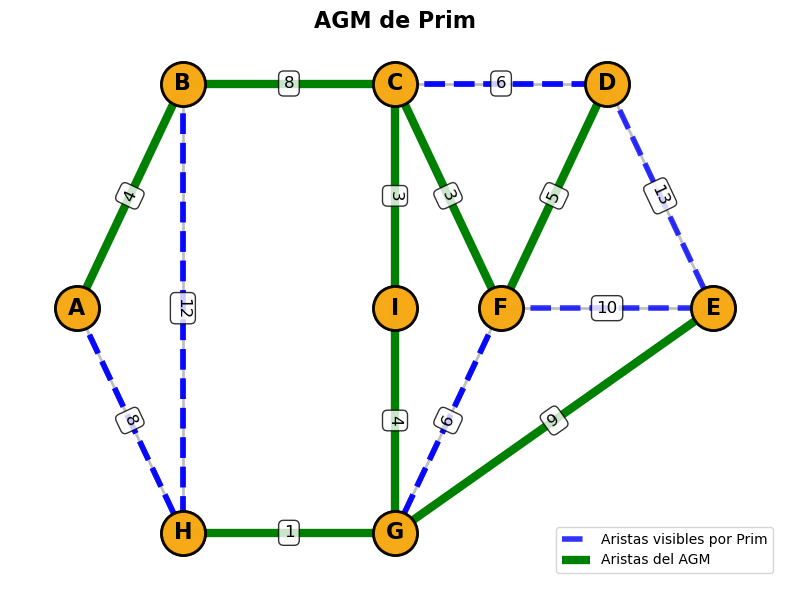

In [16]:
edge_labels = nx.get_edge_attributes(G, 'weight')

E_AG = []
V_AG = []
V_AG.append(str(np.random.choice(G.nodes)))

# funcion que busca todos los vecinos de un nodo
def busca_aristas(v, G):
        aristas = []
        for edge in G.edges:
            if v in edge:
                aristas.append(edge)
        return aristas

# funcion que busca todas las aristas alcanzables para nodos del AGM
# implementación muy poco óptima!
def busca_todas(V_AG, G):
    todas = []
    for v in V_AG:
        aristas = busca_aristas(v, G)
        todas.extend(aristas)    
    return todas

for i in range(len(G.nodes) - 1):
    aristas_alcanzables = busca_todas(V_AG,G)
    pesos = [edge_labels[e] for e in aristas_alcanzables]
    
    orden = np.argsort(pesos).astype(int)
    aristas_ordenadas = [aristas_alcanzables[i] for i in orden]
    
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', 
                        alpha=0.9, edgecolors='black', linewidths=2)

    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')
    
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='orange', nodelist=V_AG, label="Nodo del AGM",
                        alpha=0.9, edgecolors='black', linewidths=2)

    # Resaltar las aristas en el edge_list
    nx.draw_networkx_edges(G, pos, edgelist=aristas_alcanzables, width=4, alpha=0.8, edge_color='blue', style='dashed', label="Aristas visibles por Prim")
    nx.draw_networkx_edges(G, pos, edgelist=E_AG, width=6, edge_color='green', label="Aristas del AGM")
    nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12,
                                bbox=dict(boxstyle='round,pad=0.3',
                                        facecolor='white', alpha=0.8))

    plt.title("Prim iteración %s" %(i+1), fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.legend(loc="lower right")
    plt.tight_layout()
    
    for arista in aristas_ordenadas:
        A, B = arista
        if A in V_AG and B not in V_AG:
            V_AG.append(B)
            E_AG.append(arista)
            break
        elif A not in V_AG and B in V_AG:
            V_AG.append(A)
            E_AG.append(arista)
            break

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', 
                    alpha=0.9, edgecolors='black', linewidths=2)

nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='orange', nodelist=V_AG, 
                    alpha=0.9, edgecolors='black', linewidths=2)

# Resaltar las aristas en el edge_list
nx.draw_networkx_edges(G, pos, edgelist=aristas_alcanzables, width=4, alpha=0.8, edge_color='blue', style='dashed', label="Aristas visibles por Prim")
nx.draw_networkx_edges(G, pos, edgelist=E_AG, width=6, edge_color='green', label="Aristas del AGM")
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12,
                            bbox=dict(boxstyle='round,pad=0.3',
                                    facecolor='white', alpha=0.8))

plt.title("AGM de Prim", fontsize=16, fontweight='bold')
plt.axis('off')
plt.legend(loc="lower right")
plt.tight_layout()
    

El código anterior tiene muchos problemas de eficiencia, ya que fue hecho sobre la marcha en clase.
Piensen como mejorar el guardado de las aristas para no tener que recorrer todo el grafo en cada iteración.

### Kruskal

Implementación rápida de kruskal basada en conjuntos disjuntos (para saber que arista implica un ciclo), implementada mediante una lista de conjuntos.

('H', 'G')
('C', 'I')
('C', 'F')
('A', 'B')
('I', 'G')
('D', 'F')
('A', 'H')
('E', 'G')


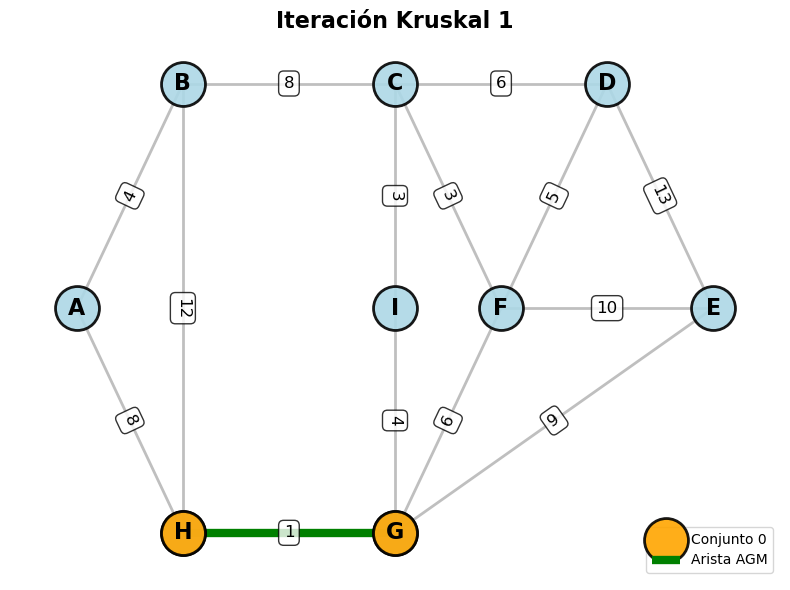

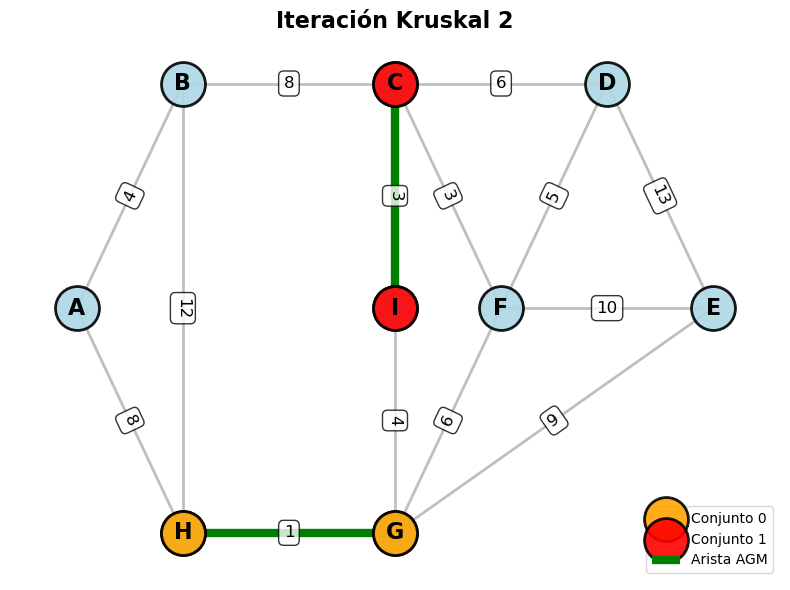

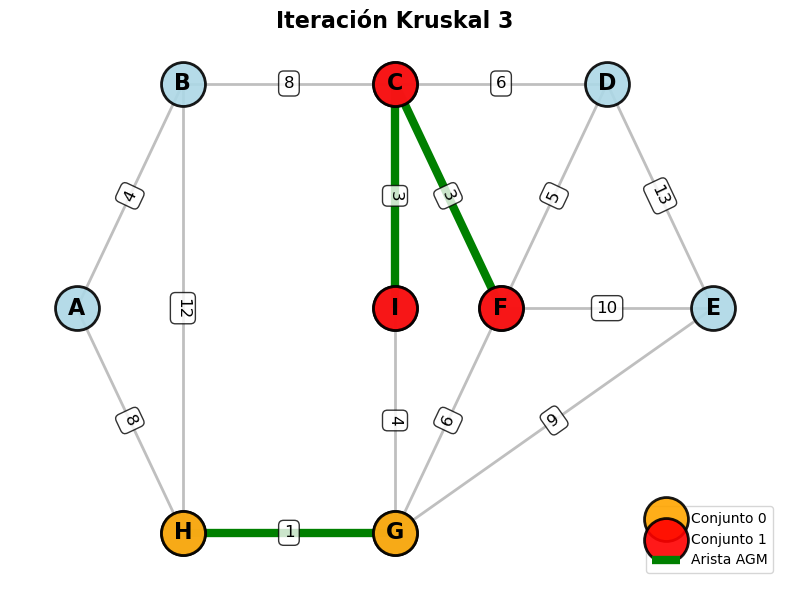

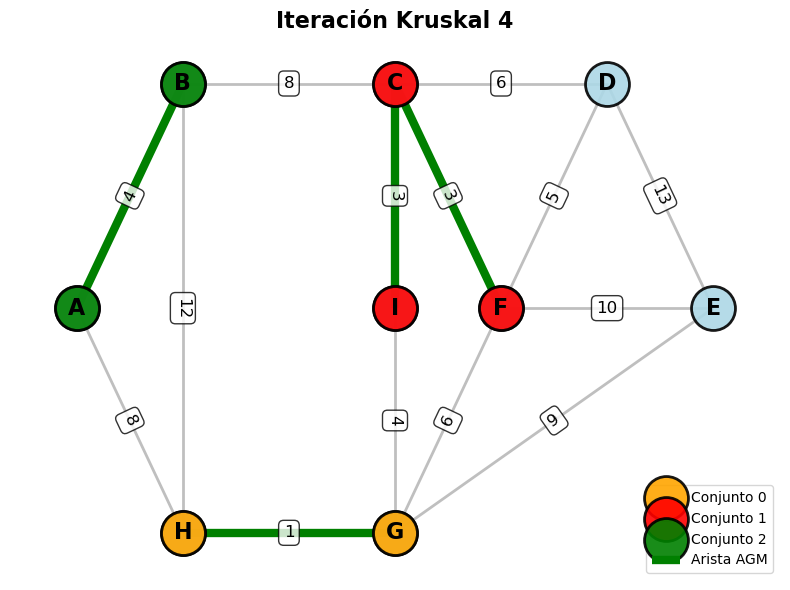

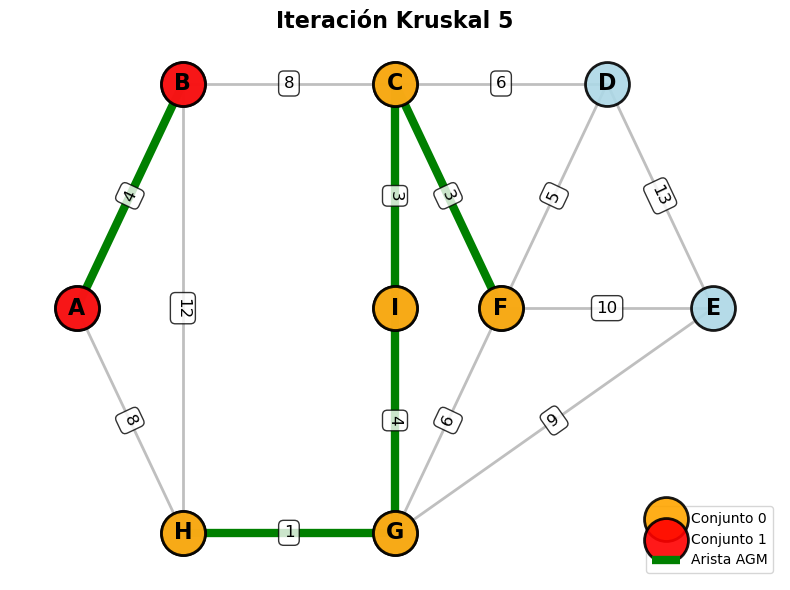

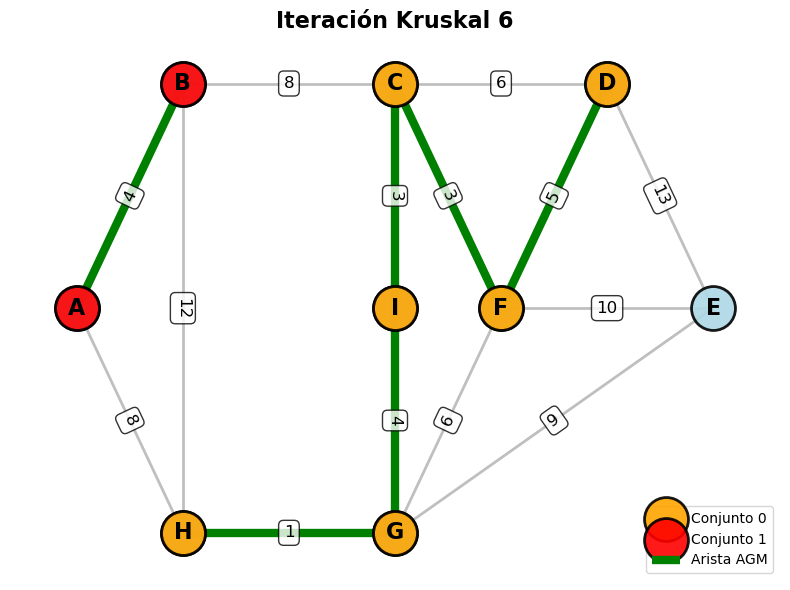

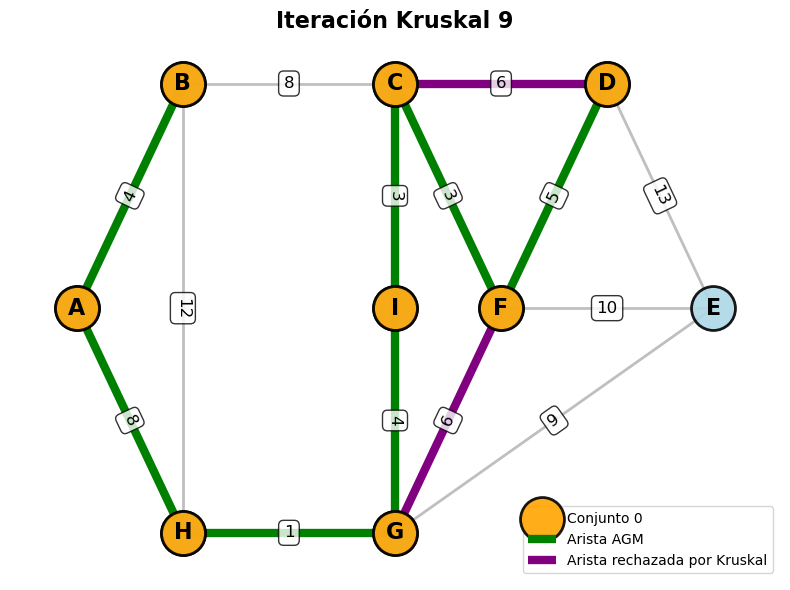

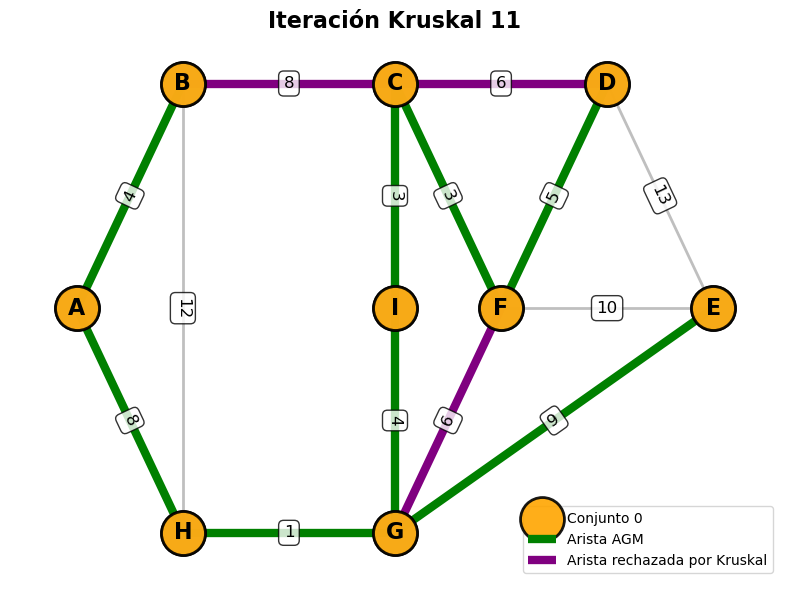

In [21]:
lista_conjuntos = []
aristas_ordenadas = sorted(G.edges(data=False), key=lambda x: G[x[0]][x[1]]['weight'])
X_T = []
X_rechazado = []
colors = ['orange', 'red', 'green', 'blue', 'yellow']

for i in range(0, len(aristas_ordenadas)):
    A, B = aristas_ordenadas[i]
    ID_A = -1
    ID_B = -1
    for j in range(0, len(lista_conjuntos)):
        if A in lista_conjuntos[j]:
            ID_A = j 
        if B in lista_conjuntos[j]:
            ID_B = j 
    
    if ID_A == -1 and ID_B == -1:
        conjunto = set([A, B])
        lista_conjuntos.append(conjunto)
    elif ID_A != ID_B and ID_B == -1:
        lista_conjuntos[ID_A].add(B)
    elif ID_A != ID_B and ID_A == -1:
        lista_conjuntos[ID_B].add(A)
    elif ID_A != ID_B and ID_A != -1 and ID_B != -1:
        lista_conjuntos[ID_B] = lista_conjuntos[ID_B].union(lista_conjuntos[ID_A])
        lista_conjuntos.pop(ID_A)
    else:
        X_rechazado.append(aristas_ordenadas[i])
        continue
    
    X_T.append(aristas_ordenadas[i])
    print(aristas_ordenadas[i])
    
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', 
                        alpha=0.9, edgecolors='black', linewidths=2)

    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')

    for j in range(len(lista_conjuntos)):
        nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=colors[j], nodelist=lista_conjuntos[j], 
                            alpha=0.9, edgecolors='black', linewidths=2, label="Conjunto %s"%j)

    # Resaltar las aristas en el edge_list
    nx.draw_networkx_edges(G, pos, edgelist=X_T, width=6, edge_color='green', label="Arista AGM")
    nx.draw_networkx_edges(G, pos, edgelist=X_rechazado, width=6, edge_color='purple', label="Arista rechazada por Kruskal")
    nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12,
                                bbox=dict(boxstyle='round,pad=0.3',
                                        facecolor='white', alpha=0.8))

    plt.title("Iteración Kruskal %s" %(i+1), fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.legend(loc="lower right")
    plt.tight_layout()
        
        
    